In [1]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [2]:
df = pd.read_csv('../dataset/movies_complete.csv')

In [3]:
#df.dropa(subset=['genre'])

In [4]:
df.set_index('filename', inplace=True)
df

,Unnamed: 0,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,Ratings,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response
filename,,,,,,,,,,,,,,,,,,,,,
6416324.xml,0,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.1,76,movie,NaN,NaN,NaN,NaN,True
4732286.xml,1,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,"nm0440757,nm0833141,nm1127102",...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.0,19,movie,NaN,NaN,NaN,NaN,True
6122081.xml,2,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,nm0816215,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.6,25,movie,NaN,NaN,NaN,NaN,True
5594522.xml,3,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82.0,nm1172472,NaN,...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.8,23,movie,NaN,NaN,NaN,NaN,True
5618549.xml,4,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,"nm0032816,nm0793999,nm0814232",...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.6,32,movie,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007863.xml,3723,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,nm2670218,"nm0613444,nm4963204",...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,6.7,"6,466",movie,20 May 2017,NaN,Netflix,NaN,True
7036888.xml,3724,NETFLIX PRÄSENTIERT - Mr. Moody ? - Ja . - Tut...,tt6598626,"Comedy,Crime",2017.0,NaN,untokenisiert,83.0,nm0372366,nm6782145,...,"[{'Source': 'Internet Movie Database', 'Value'...",56.0,6.1,"3,549",movie,NaN,"$2,583",The Orchard,NaN,True
6984880.xml,3725,EINE NETFLIX ORIGINAL DOKUMENTATION Wir müssen...,tt6714534,"Biography,Documentary",2017.0,NaN,untokenisiert,92.0,"nm1412827,nm2595452,nm1906442","nm1906442,nm2595452,nm1412827",...,"[{'Source': 'Internet Movie Database', 'Value'...",75.0,7.4,"5,982",movie,NaN,NaN,NaN,NaN,True


In [5]:
df['main_genre'] = df.genre.str.split(',')

In [6]:
dff = df.main_genre
dff

filename
6416324.xml    [Adventure, Drama, History]
4732286.xml                       [Comedy]
6122081.xml                        [Drama]
5594522.xml            [Action, Adventure]
5618549.xml                       [Action]
                          ...             
7007863.xml            [Animation, Sci-Fi]
7036888.xml                [Comedy, Crime]
6984880.xml       [Biography, Documentary]
7000718.xml             [Sci-Fi, Thriller]
7017079.xml                            NaN
Name: main_genre, Length: 3728, dtype: object

In [7]:
dff_f = dff.dropna()
#dff_f = dff.drop_duplicates()
dff_f

filename
6416324.xml    [Adventure, Drama, History]
4732286.xml                       [Comedy]
6122081.xml                        [Drama]
5594522.xml            [Action, Adventure]
5618549.xml                       [Action]
                          ...             
7063865.xml               [Drama, Romance]
7007863.xml            [Animation, Sci-Fi]
7036888.xml                [Comedy, Crime]
6984880.xml       [Biography, Documentary]
7000718.xml             [Sci-Fi, Thriller]
Name: main_genre, Length: 3721, dtype: object

In [8]:
dff_f = dff_f.apply(lambda x: x[0])
dff_f

filename
6416324.xml    Adventure
4732286.xml       Comedy
6122081.xml        Drama
5594522.xml       Action
5618549.xml       Action
                 ...    
7063865.xml        Drama
7007863.xml    Animation
7036888.xml       Comedy
6984880.xml    Biography
7000718.xml       Sci-Fi
Name: main_genre, Length: 3721, dtype: object

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df.text)

In [10]:
from umap import UMAP 
reducer = UMAP()
Xr_tfidf = reducer.fit_transform(X_tfidf)

In [11]:
Xr_tfidf

array([[-2.848536  ,  5.660336  ],
       [-2.0433476 ,  7.172919  ],
       [-3.5881968 , 10.563603  ],
       ...,
       [-0.0286096 ,  6.180493  ],
       [-2.5868003 ,  5.8588476 ],
       [-0.55145997,  7.8424525 ]], dtype=float32)

In [12]:
Xr_tfidf.shape

(3728, 2)

In [13]:
dff_f

filename
6416324.xml    Adventure
4732286.xml       Comedy
6122081.xml        Drama
5594522.xml       Action
5618549.xml       Action
                 ...    
7063865.xml        Drama
7007863.xml    Animation
7036888.xml       Comedy
6984880.xml    Biography
7000718.xml       Sci-Fi
Name: main_genre, Length: 3721, dtype: object

In [14]:
df["main_single_genre"] = dff_f

In [15]:
df

,Unnamed: 0,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response,main_genre,main_single_genre
filename,,,,,,,,,,,,,,,,,,,,,
6416324.xml,0,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",...,7.1,76,movie,NaN,NaN,NaN,NaN,True,"[Adventure, Drama, History]",Adventure
4732286.xml,1,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,"nm0440757,nm0833141,nm1127102",...,6.0,19,movie,NaN,NaN,NaN,NaN,True,[Comedy],Comedy
6122081.xml,2,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,nm0816215,...,6.6,25,movie,NaN,NaN,NaN,NaN,True,[Drama],Drama
5594522.xml,3,Dein Vater war ein ausgezeichneter Kämpfer . A...,tt3141954,"Action,Adventure",1978.0,Cantonese,untokenisiert,82.0,nm1172472,NaN,...,5.8,23,movie,NaN,NaN,NaN,NaN,True,"[Action, Adventure]",Action
5618549.xml,4,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,"nm0032816,nm0793999,nm0814232",...,5.6,32,movie,NaN,NaN,NaN,NaN,True,[Action],Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7007863.xml,3723,"Niemand weiß , wann die Welt zu dem wurde , wa...",tt6574146,"Animation,Sci-Fi",2017.0,NaN,untokenisiert,106.0,nm2670218,"nm0613444,nm4963204",...,6.7,"6,466",movie,20 May 2017,NaN,Netflix,NaN,True,"[Animation, Sci-Fi]",Animation
7036888.xml,3724,NETFLIX PRÄSENTIERT - Mr. Moody ? - Ja . - Tut...,tt6598626,"Comedy,Crime",2017.0,NaN,untokenisiert,83.0,nm0372366,nm6782145,...,6.1,"3,549",movie,NaN,"$2,583",The Orchard,NaN,True,"[Comedy, Crime]",Comedy
6984880.xml,3725,EINE NETFLIX ORIGINAL DOKUMENTATION Wir müssen...,tt6714534,"Biography,Documentary",2017.0,NaN,untokenisiert,92.0,"nm1412827,nm2595452,nm1906442","nm1906442,nm2595452,nm1412827",...,7.4,"5,982",movie,NaN,NaN,NaN,NaN,True,"[Biography, Documentary]",Biography


# Visualization all Data

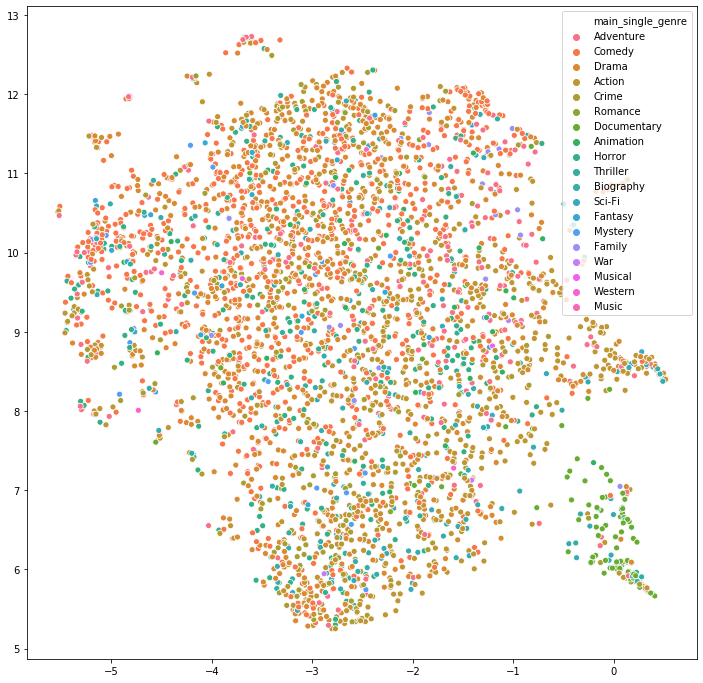

In [16]:
plt.figure(figsize=(12,12))
sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df['main_single_genre'])
plt.show()

In [17]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(Xr_tfidf[:,0], Xr_tfidf[:,1], hue=df.main_single_genre.loc[df.main_single_genre == "Crime"])


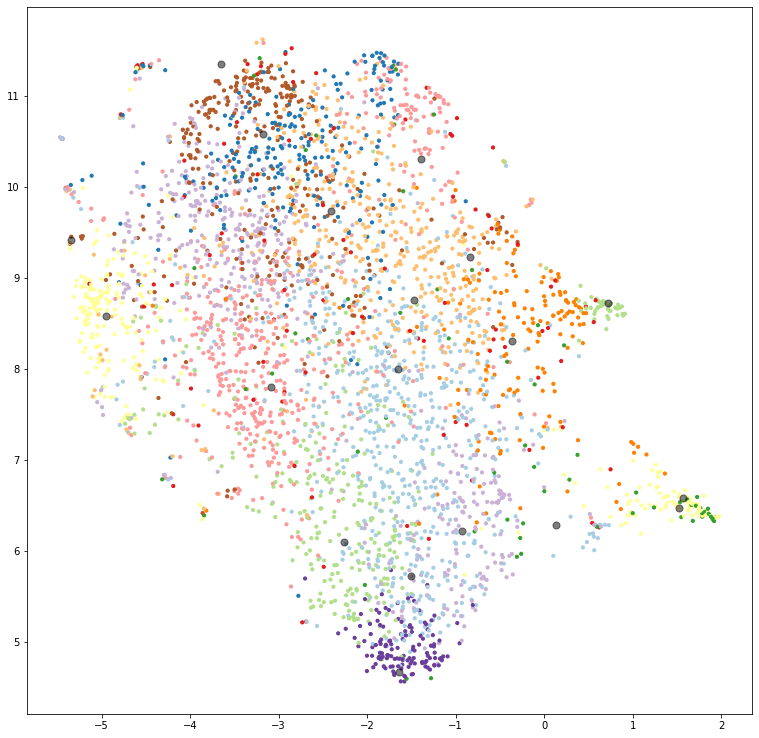

In [19]:
kmeans = KMeans(n_clusters=19)
kmeans.fit(X_tfidf)
y_kmeans = kmeans.predict(X_tfidf)

from umap import UMAP 
reducer = UMAP()
Xrr_tfidf = reducer.fit_transform(X_tfidf)

plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)

#centroid
centers = reducer.transform(kmeans.cluster_centers_)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)

In [ ]:
plt.figure(figsize =(13,13))
plt.scatter(Xrr_tfidf[:, 0], Xrr_tfidf[:, 1], c=y_kmeans, s=10, cmap=plt.cm.Paired)




In [ ]:
df['clusterID'] = kmeans.labels_

In [ ]:
df.clusterID

In [ ]:
d=df.T

In [ ]:
d.loc[["main_single_genre", "clusterID"]]